In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv("../data/user_visit_duration.csv")

In [4]:
data.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


In [4]:
yes = data[data["Buy"] == 1]["Time (min)"]
no = data[data["Buy"] == 0]["Time (min)"]

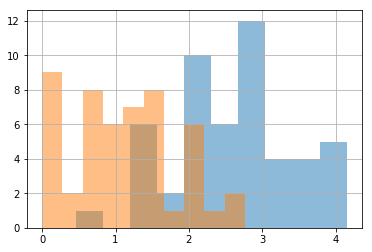

In [5]:
yes.hist(alpha = 0.5)
no.hist(alpha = 0.5)

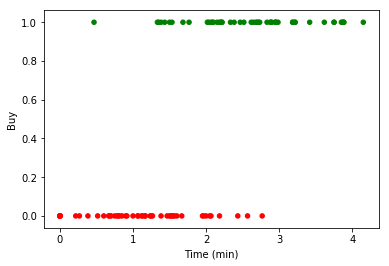

In [6]:
colors = {0 :"Red", 1: "Green"}
data.plot(kind="scatter", x="Time (min)", y="Buy", c=[colors[i] for i in data["Buy"]])

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(data["Time (min)"].values, data["Buy"].values, test_size=0.2)
print("Train: ", len(X_train), " test: ",len(X_test))

Train:  80  test:  20


In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [10]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation="sigmoid"))

In [11]:
model.compile(SGD(lr=0.8), "binary_crossentropy", metrics=["accuracy"])

In [12]:
model.fit(X_train, Y_train, epochs=25)

Epoch 1/25
80/80 [==============================] - 0s - loss: 0.6073 - acc: 0.6000     
Epoch 2/25
80/80 [==============================] - 0s - loss: 0.5540 - acc: 0.7125     
Epoch 3/25
80/80 [==============================] - 0s - loss: 0.5263 - acc: 0.7625     
Epoch 4/25
80/80 [==============================] - 0s - loss: 0.4899 - acc: 0.7875     
Epoch 5/25
80/80 [==============================] - 0s - loss: 0.4772 - acc: 0.8125     
Epoch 6/25
80/80 [==============================] - 0s - loss: 0.4509 - acc: 0.8250     
Epoch 7/25
80/80 [==============================] - 0s - loss: 0.4368 - acc: 0.8000     
Epoch 8/25
80/80 [==============================] - 0s - loss: 0.4243 - acc: 0.8375     
Epoch 9/25
80/80 [==============================] - 0s - loss: 0.4139 - acc: 0.8000     
Epoch 10/25
80/80 [==============================] - 0s - loss: 0.4301 - acc: 0.8125     
Epoch 11/25
80/80 [==============================] - 0s - loss: 0.4034 - acc: 0.8500     
Epoch 12/25
80/80 [

In [19]:
y_pred = model.predict(X_test)
y_pred_cls = model.predict_classes(X_test)

20/20 [==============================] - 0s


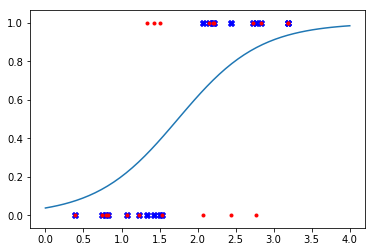

In [20]:
plt.scatter(x=X_test, y=y_pred_cls, color="b", marker="X")
plt.scatter(x=X_test, y=Y_test, color="r", marker=".")
tmp = np.linspace(0, 4)
plt.plot(tmp, model.predict(tmp))

In [21]:
from sklearn.metrics import accuracy_score

In [16]:
print(accuracy_score(y_pred_cls, Y_test))

0.7


In [17]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion_matrix(Y_test, y_pred_cls)

array([[7, 3],
       [3, 7]])

In [23]:
def pretty_confusion_matrix(y_true, y_pred, labels = ["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ["Predicted " + l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [25]:
pretty_confusion_matrix(Y_test, y_pred_cls, ["Not buy", "Buy"])

,Predicted Not buy,Predicted Buy
Not buy,7,3
Buy,3,7


In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [27]:
print("Precision: ", precision_score(Y_test, y_pred_cls))
print("Recall: ", recall_score(Y_test, y_pred_cls))
print("F1_score: ", f1_score(Y_test, y_pred_cls))

Precision:  0.7
Recall:  0.7
F1_score:  0.7


In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(Y_test, y_pred_cls))

             precision    recall  f1-score   support

          0       0.70      0.70      0.70        10
          1       0.70      0.70      0.70        10

avg / total       0.70      0.70      0.70        20

